# Processamento de Séries Temporais



## Por quê?

* Nem todos os dados são estruturados
* Muitos dados chegam em tempo real, em forma de eventos
* Geralmente formam séries temporais
* Necessidade de tomar ações sobre dados em tempo real
* Sequência ou grupo de eventos → ação

## Aplicações

* Trading algorítimico
* *Smart Patient Care*
* Detecção de anomalias
* IoT: Smart Car, Smart Home
* Alocação dinâmica de recursos -- previsão de demanda por energia na rede elétrica
* Monitoramento
* Manutenção preventiva
* Geospatial data processing
* Etc, etc, etc

![](https://1fykyq3mdn5r21tpna3wkdyi-wpengine.netdna-ssl.com/wp-content/uploads/2017/06/HEADER.png)


## Métodos de previsão

### Clássicos

* Moving average
* ARIMA
* Exponential smoothing
* …

Outros: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

### Machine Learning

* RNNs
* Gradient boosting
* etc

Métodos de regressão em geral, desde que apropriadamente modelado.

## Como identificar que é um problema de série temporal?

Existe um caráter de autocorrelação entre a observação atual e um grupo de observações anteriores; ie - os eventos não são independentes.

## Como modelar o problema?

O problema de *forecasting* em séries temporais pode ser modelado tanto como um problema de classificação quanto um problema de regressão.

* **Regressão**: qual será a temperatura média do próximo mês?
* **Classificação**: a temperatura média do próximo mês será maior ou menor? (binário)


## Trabalhando com séries temporais em Pandas

A unidade básica é a `datetime`, que é um objeto que armazena uma série de informações e métodos para manipular unidades de tempo.

In [1]:
from datetime import datetime
dt = datetime(year=2015, month=7, day=4)
print(f"Date is: {dt}")

dt = datetime.now()
print(f"Now is: {dt}")

# possível formatar diretamente a string
dt = datetime.now()
print(f"Hoje é: {dt:%d/%m/%Y}, dia da semana: {dt:%a} ou {dt:%A}")

Date is: 2015-07-04 00:00:00
Now is: 2020-09-25 20:14:33.970313
Hoje é: 25/09/2020, dia da semana: Fri ou Friday


O `numpy` possui um tipo específico para lidar com datetime, que é o `np.datetime64`, utilizado para indexar dataframes de séries temporais. Com isso, podemos fazer operações vetorizadas.

In [2]:
import numpy as np
date_index = np.datetime64("2018-07-02") + np.arange(12)
date_index

array(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
       '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
       '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13'],
      dtype='datetime64[D]')

### `DatetimeIndex`

Podemos manipular diretamente no `pandas` para criar *índices* temporais.

In [3]:
import pandas as pd
date = pd.to_datetime("2018-07-02")
date += pd.to_timedelta(np.arange(60), 'D')
date

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-07', '2018-07-08', '2018-07-09',
               '2018-07-10', '2018-07-11', '2018-07-12', '2018-07-13',
               '2018-07-14', '2018-07-15', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-21',
               '2018-07-22', '2018-07-23', '2018-07-24', '2018-07-25',
               '2018-07-26', '2018-07-27', '2018-07-28', '2018-07-29',
               '2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-04', '2018-08-05', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-11', '2018-08-12', '2018-08-13', '2018-08-14',
               '2018-08-15', '2018-08-16', '2018-08-17', '2018-08-18',
               '2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-25', '2018-08-26',
      

In [4]:
df = pd.DataFrame(np.arange(len(date)), index=date)
df.tail()

,0
2018-08-26,55
2018-08-27,56
2018-08-28,57
2018-08-29,58
2018-08-30,59


Podemos indexar diretamente pelo tempo:

In [5]:
df["2018-07-05" : "2018-07-08"]

,0
2018-07-05,3
2018-07-06,4
2018-07-07,5
2018-07-08,6


In [6]:
df["2018-07"].tail()

,0
2018-07-27,25
2018-07-28,26
2018-07-29,27
2018-07-30,28
2018-07-31,29


### `pd.date_range`

Regularmente é usada essa função para criar "fatias" de tempo.

In [7]:
pd.date_range('2018-07-02', '2018-07-03', freq='D')

DatetimeIndex(['2018-07-02', '2018-07-03'], dtype='datetime64[ns]', freq='D')

In [8]:
pd.date_range('2018-07-02', periods=20, freq='s')

DatetimeIndex(['2018-07-02 00:00:00', '2018-07-02 00:00:01',
               '2018-07-02 00:00:02', '2018-07-02 00:00:03',
               '2018-07-02 00:00:04', '2018-07-02 00:00:05',
               '2018-07-02 00:00:06', '2018-07-02 00:00:07',
               '2018-07-02 00:00:08', '2018-07-02 00:00:09',
               '2018-07-02 00:00:10', '2018-07-02 00:00:11',
               '2018-07-02 00:00:12', '2018-07-02 00:00:13',
               '2018-07-02 00:00:14', '2018-07-02 00:00:15',
               '2018-07-02 00:00:16', '2018-07-02 00:00:17',
               '2018-07-02 00:00:18', '2018-07-02 00:00:19'],
              dtype='datetime64[ns]', freq='S')

### Métodos

In [9]:
!pip install --quiet pandas-datareader

In [12]:
!pip install --quiet yfinance

In [75]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 
start_date = datetime(2016, 1, 1)
end_date = datetime(2020, 9, 25)
df = pdr.get_data_yahoo("^BVSP", start=start_date, end=end_date)
df.index = pd.to_datetime(df.index) # indice nao vem como datetime
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-18,100098.0,100102.0,98045.0,98290.0,98290.0,11370300
2020-09-21,98283.0,98283.0,95820.0,96991.0,96991.0,9738000
2020-09-22,96995.0,97684.0,96390.0,97294.0,97294.0,7281300
2020-09-23,97294.0,97389.0,95728.0,95735.0,95735.0,8830700
2020-09-24,95735.0,97955.0,95653.0,97012.0,97012.0,9331000


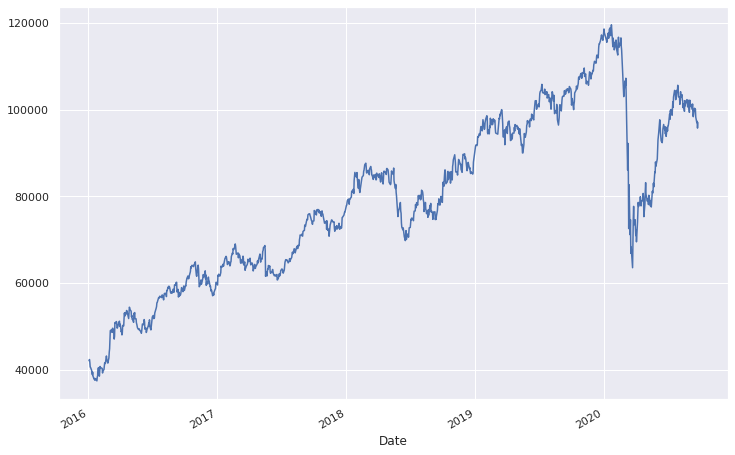

In [76]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(12, 8))
data = df.Close
data.plot()

Uma necessidade comum com séries temporais é de obter uma amostra do dado em uma frequência menor do que o dado original, seja agrupando ou selecionando.

* `asfreq`: *data selection*
* `resample`: *data aggregation*

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

No exemplo abaixo, `resample` mostra a média do ano anterior, enquanto `asfreq` reporta o valor final ao fim do ano.

In [77]:
data.resample('182D').mean()

Date
2016-01-04     47370.064516
2016-07-04     59099.648000
2017-01-02     64400.105691
2017-07-03     71697.379032
2018-01-01     81694.131148
2018-07-02     81568.434426
2018-12-31     95947.842975
2019-07-01    105147.488000
2019-12-30     94105.520661
2020-06-29    100731.253968
Freq: 182D, Name: Close, dtype: float64

In [66]:
data.asfreq('182D')

Date
2016-01-04    201.020004
2016-07-04           NaN
2017-01-02           NaN
2017-07-03    242.210007
2018-01-01           NaN
2018-07-02    271.859985
2018-12-31    249.919998
2019-07-01    295.660004
2019-12-30    321.079987
2020-06-29    304.459991
Freq: 182D, Name: Close, dtype: float64

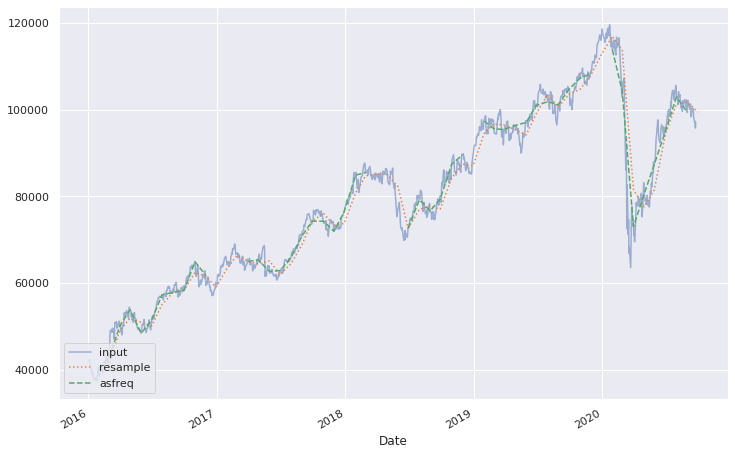

In [79]:
plt.figure(figsize=(12, 8))
data["2016":].plot(alpha=0.5, style='-')
data.resample('BM').mean().plot(style=':')
data.asfreq('BM').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='lower left');

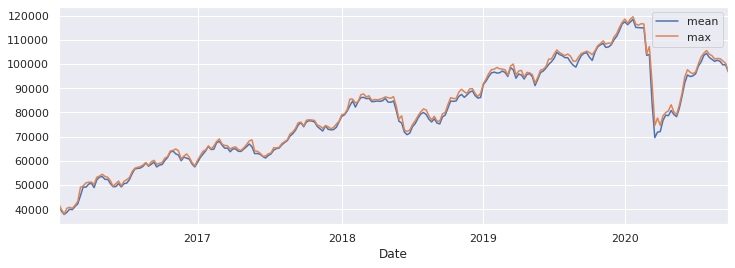

In [80]:
plt.figure(figsize=(12, 4))
data.resample("W").mean().plot(label='mean')
data.resample("W").max().plot(label='max')
plt.legend()

### Janela deslizante

Outra aplicação comum em processamento de séries temporais são operações de janelas deslizantes. 

Rolling [window=182,center=False,axis=0]

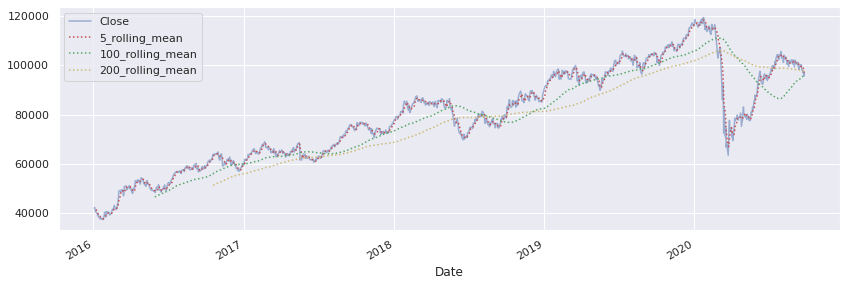

In [81]:
plt.figure(figsize=(14, 10))

plt.subplot(211)
data.plot(alpha=.5)
(data.rolling(5)
 .mean()
 .plot(label="5_rolling_mean", style='r:', alpha=1)
)
(data.rolling(100)
 .mean()
 .plot(label="100_rolling_mean", style='g:', alpha=1)
)
(data.rolling(200)
 .mean()
 .plot(label="200_rolling_mean", style='y:', alpha=1)
)
plt.legend()

In [82]:
data.head()

Date
2016-01-04    42141.0
2016-01-05    42419.0
2016-01-06    41773.0
2016-01-07    40695.0
2016-01-08    40612.0
Name: Close, dtype: float64

In [56]:
a = data.resample("m") # reamostragem de acordo com o mes


pandas.core.resample.DatetimeIndexResampler

In [51]:
data.resample("m") # reamostragem de acordo com o mes
data.rolling(182).mean() # funcoes de janela deslizente 
data.index.dayofweek # transforma todo indice em dayofweek
data.groupby # funcao de agrupamento

<bound method Series.groupby of Date
2016-01-04    201.020004
2016-01-05    201.360001
2016-01-06    198.820007
2016-01-07    194.050003
2016-01-08    191.919998
                 ...    
2020-09-18    330.649994
2020-09-21    326.970001
2020-09-22    330.299988
2020-09-23    322.640015
2020-09-24    323.500000
Name: Close, Length: 1191, dtype: float64>

In [86]:
data.resample("m").sum()

Date
2016-01-31     748413.0
2016-02-29     779481.0
2016-03-31    1081831.0
2016-04-30    1037043.0
2016-05-31    1071339.0
2016-06-30    1103548.0
2016-07-31    1155462.0
2016-08-31    1333725.0
2016-09-30    1226915.0
2016-10-31    1249548.0
2016-11-30    1232388.0
2016-12-31    1241651.0
2017-01-31    1334206.0
2017-02-28    1196002.0
2017-03-31    1495648.0
2017-04-30    1160440.0
2017-05-31    1432575.0
2017-06-30    1302342.0
2017-07-31    1354590.0
2017-08-31    1582513.0
2017-09-30    1486136.0
2017-10-31    1598433.0
2017-11-30    1393804.0
2017-12-31    1474999.0
2018-01-31    1697375.0
2018-02-28    1440003.0
2018-03-31    1789139.0
2018-04-30    1785676.0
2018-05-31    1728195.0
2018-06-30    1526296.0
2018-07-31    1616865.0
2018-08-31    1789410.0
2018-09-30    1464191.0
2018-10-31    1852337.0
2018-11-30    1661368.0
2018-12-31    1567178.0
2019-01-31    1984417.0
2019-02-28    1934376.0
2019-03-31    1735573.0
2019-04-30    2002761.0
2019-05-31    2071697.0
2019-06-30 

In [87]:
resampled.rolling(3).mean()

Date
2016-01-31             NaN
2016-02-29             NaN
2016-03-31    8.699083e+05
2016-04-30    9.661183e+05
2016-05-31    1.063404e+06
2016-06-30    1.070643e+06
2016-07-31    1.110116e+06
2016-08-31    1.197578e+06
2016-09-30    1.238701e+06
2016-10-31    1.270063e+06
2016-11-30    1.236284e+06
2016-12-31    1.241196e+06
2017-01-31    1.269415e+06
2017-02-28    1.257286e+06
2017-03-31    1.341952e+06
2017-04-30    1.284030e+06
2017-05-31    1.362888e+06
2017-06-30    1.298452e+06
2017-07-31    1.363169e+06
2017-08-31    1.413148e+06
2017-09-30    1.474413e+06
2017-10-31    1.555694e+06
2017-11-30    1.492791e+06
2017-12-31    1.489079e+06
2018-01-31    1.522059e+06
2018-02-28    1.537459e+06
2018-03-31    1.642172e+06
2018-04-30    1.671606e+06
2018-05-31    1.767670e+06
2018-06-30    1.680056e+06
2018-07-31    1.623785e+06
2018-08-31    1.644190e+06
2018-09-30    1.623489e+06
2018-10-31    1.701979e+06
2018-11-30    1.659299e+06
2018-12-31    1.693628e+06
2019-01-31    1.737654e

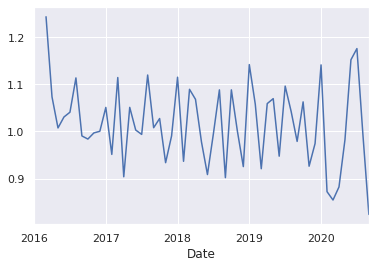

In [85]:
resampled = data.resample("m").sum()
resp = (resampled / resampled.rolling(3).mean())
resp.plot()

### Exercícios

1. Plote um gráfico que mostra a variação percentual mensal entre o volume de *trades* ocorridos nesse mês em relação à média dos últimos 3 meses.

2. Qual o dia da semana que há maior volume de *trades*? Plot um gráfico que mostra a mediana de trades por dia da semana (pode ser um gráfico de barras).
 
    *Hint #1*: manipule o índice temporal.
    
    *Hint #2*: use a operação de agrupamento `groupby`.

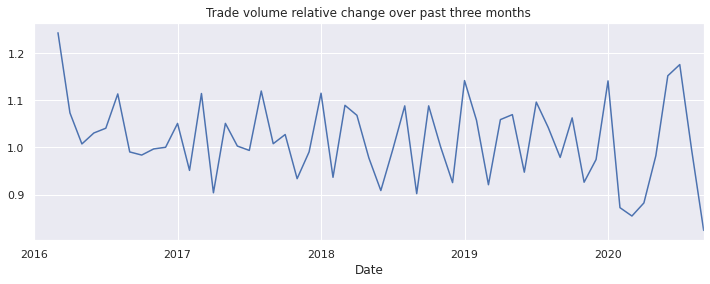

In [88]:
plt.figure(figsize=(12, 4))
monthly = data.resample("m").sum()
diff = (monthly / monthly.rolling(3).mean())
diff.plot(title="Trade volume relative change over past three months")

In [108]:
df.Volume.groupby((df.Volume.index.dayofweek)).median()

Date
0    3504900
1    3921300
2    4233500
3    4050800
4    4079900
Name: Volume, dtype: int64

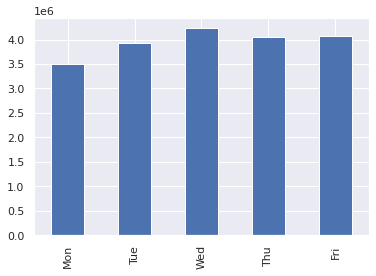

In [110]:
median_by_day = df.Volume.groupby(df.Volume.index.dayofweek).median()
median_by_day.index = ["Mon", "Tue", "Wed", "Thu", "Fri"]
median_by_day.plot(kind="bar")

## Bonus: Prophet

> "Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well."

Utilizaremos para ver quão bom o `prophet` é em prever um indicador da bolsa de valores (e exatamente porque você não deveria fazer isso).

In [92]:
!pip install --quiet fbprophet

In [100]:
from fbprophet import Prophet

prophet_df = df[["Close"]].reset_index()
prophet_df.columns = ["ds", "y"]
prophet_df.tail()

,ds,y
1165,2020-09-18,98290.0
1166,2020-09-21,96991.0
1167,2020-09-22,97294.0
1168,2020-09-23,95735.0
1169,2020-09-24,97012.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


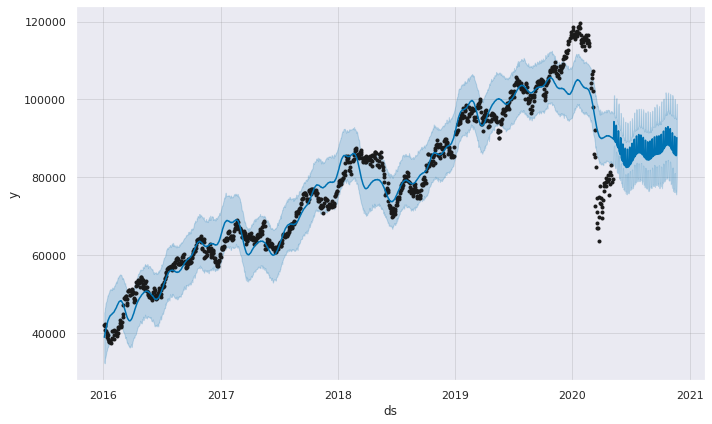

In [101]:
m = Prophet()
m.fit(prophet_df[:-100])
pred = m.predict(m.make_future_dataframe(periods=200))
m.plot(pred); # weird bug causes to plot twice, put ; in the end

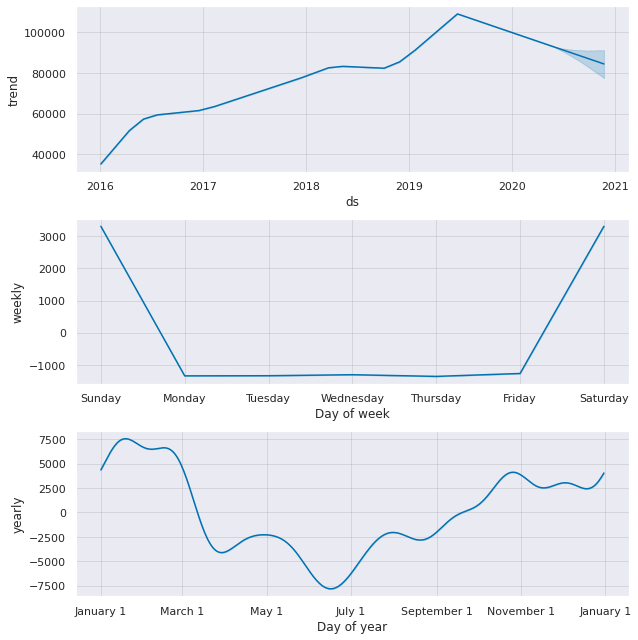

In [102]:
m.plot_components(pred);

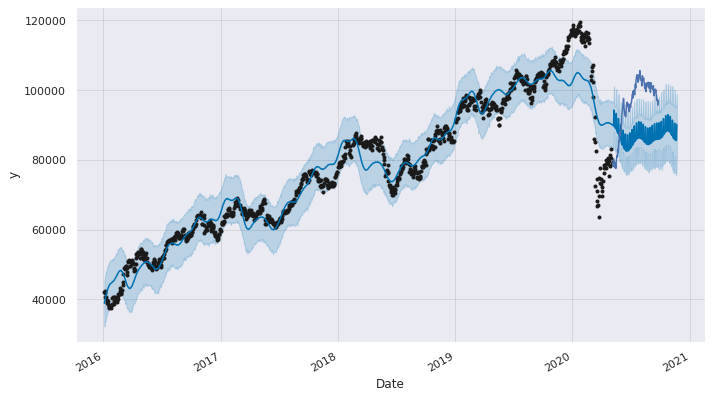

In [106]:
m.plot(pred); # weird bug causes to plot twice, put ; in the end
df.Close[-100:].plot()

## Referências

### Tutoriais:

* Vários notebooks com tutoriais: https://github.com/jakevdp/PythonDataScienceHandbook/ (maior parte da aula veio daqui)
* prophet docs: https://facebook.github.io/prophet/docs/quick_start.html#python-api
* statsmodels docs: https://www.statsmodels.org/stable/examples/index.html#stats


### Indústria:

* **Uber**
    * [Forecasting at Uber: An Introduction](https://eng.uber.com/forecasting-introduction/)
    * [Engineering Extreme Event Forecasting at Uber with Recurrent Neural Networks](https://eng.uber.com/neural-networks/) (Avançado)
    
* **Lyft**
    * [How to deal with the seasonality of a market?](https://eng.lyft.com/how-to-deal-with-the-seasonality-of-a-market-584cc94d6b75)
    
* **Airbnb**
    * [Learning Market Dynamics for Optimal Pricing](https://medium.com/airbnb-engineering/learning-market-dynamics-for-optimal-pricing-97cffbcc53e3)
    * [Anomaly Detection for Aibnb's Payment Platform](https://medium.com/airbnb-engineering/anomaly-detection-for-airbnb-s-payment-platform-e3b0ec513199)